In [9]:
# Import Libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import geopandas as gpd
import matplotlib.image as mpimg
from shapely.geometry import Point, LineString
import osmnx as ox

/usr/local/lib/python3.9/site-packages/requests/__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.8) or chardet (5.2.0)/charset_normalizer (2.0.11) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


In [10]:
cities_population = {
    "Zaandam": 161429,
    "Amsterdam": 934927,
    "Haarlem": 167763,
    "Schiphol": 1,
    "Leiden": 130181,
    "Den Haag": 565701,
    "Zoetermeer": 128424,
    "Delft": 109573,
    "Rotterdam": 671125,
    "Spijkenisse": 71390,
    "Dordrecht": 122089,
    "Vlaardingen": 76472,
    "Alphen aan de Rijn": 114968,
    "Gouda": 75763,
    "Woerden": 53237,
    "Utrecht": 374411,
    "Hilversum": 94426,
    "Almere": 226630,
    "Amersfoort": 160747
}
total_population = sum(cities_population.values())

cities_percentage = {city: (population / total_population) * 5000 for city, population in cities_population.items()}

for city, percentage in cities_percentage.items():
    print(f'{city}: {percentage: }')

Zaandam:  190.39775130406107
Amsterdam:  1102.7014875484076
Haarlem:  197.86840005217894
Schiphol:  0.0011794519652854262
Leiden:  153.54223629282205
Den Haag:  667.2171562139309
Zoetermeer:  151.46993918981556
Delft:  129.23609019222
Rotterdam:  791.5597002021817
Spijkenisse:  84.20107580172657
Dordrecht:  143.9981109897324
Vlaardingen:  90.19505068930711
Alphen aan de Rijn:  135.5992335449349
Gouda:  89.35881924591973
Woerden:  62.79048427590023
Utrecht:  441.59978977448174
Hilversum:  111.37093127404167
Almere:  267.2991988926361
Amersfoort:  189.5933650637364


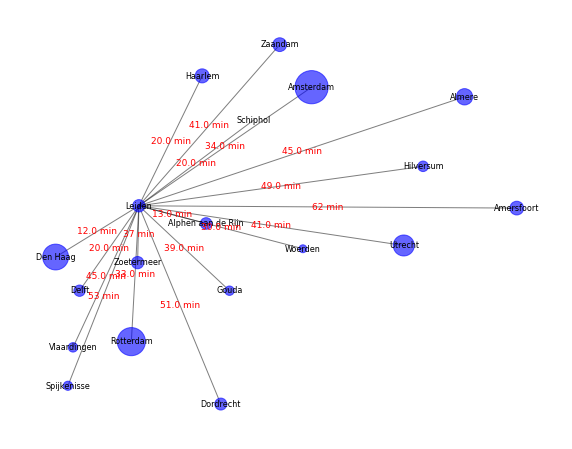

In [21]:
cities_coords = {
    "Zaandam": (52.442, 4.829),
    "Amsterdam": (52.3676, 4.9041),
    "Haarlem": (52.3874, 4.6462),
    "Schiphol": (52.3105, 4.7683),
    "Leiden": (52.1601, 4.4970),
    "Den Haag": (52.0705, 4.3007),
    "Zoetermeer": (52.0607, 4.4940),
    "Delft": (52.0116, 4.3571),
    "Rotterdam": (51.9225, 4.4792),
    "Spijkenisse": (51.8453, 4.3297),
    "Dordrecht": (51.8133, 4.6901),
    "Vlaardingen": (51.9125, 4.3417),
    "Alphen aan de Rijn": (52.1292, 4.6555),
    "Gouda": (52.0116, 4.7105),
    "Woerden": (52.0850, 4.8836),
    "Utrecht": (52.0907, 5.1214),
    "Hilversum": (52.2292, 5.1669),
    "Almere": (52.3508, 5.2647),
    "Amersfoort": (52.1561, 5.3878),
}
connections = [
    (41.0, "Zaandam", "Leiden"),
    (34.0, "Amsterdam", "Leiden"),
    (20.0, "Haarlem", "Leiden"),
    (20.0, "Schiphol", "Leiden"),
    (12.0, "Den Haag", "Leiden"),
    (37, "Zoetermeer", "Leiden"),
    (20.0, "Delft", "Leiden"),
    (33.0, "Rotterdam", "Leiden"),
    (53, "Spijkenisse", "Leiden"),
    (51.0, "Dordrecht", "Leiden"),
    (45.0, "Vlaardingen", "Leiden"),
    (13.0, "Alphen aan de Rijn", "Leiden"),
    (39.0, "Gouda", "Leiden"),
    (30.0, "Woerden", "Leiden"),
    (41.0, "Utrecht", "Leiden"),
    (49.0, "Hilversum", "Leiden"),
    (45.0, "Almere", "Leiden"),
    (62, "Amersfoort", "Leiden"),
]
G = nx.Graph()

for city, (lat, lon) in cities_coords.items():
    population_percentage = cities_percentage.get(city, 0)  # Use the percentage as node size
    G.add_node(city, pos=(lon, lat), population_percentage=population_percentage)

for minutes, city1, city2 in connections:  # Ensure connections_corrected matches city names
    if city1 in G and city2 in G:  # Check if both cities are in the graph
        G.add_edge(city1, city2, weight=minutes)

pos = nx.get_node_attributes(G, 'pos')
node_sizes = [G.nodes[city]['population_percentage'] for city in G.nodes]  # Adjust the node size scaling factor

fig, ax = plt.subplots(figsize=(10, 8))
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='blue', alpha=0.6, ax=ax)
nx.draw_networkx_labels(G, pos, font_size=8, ax=ax)
nx.draw_networkx_edges(G, pos, width=1, alpha=0.5, ax=ax)

# Annotate the edges with the distance (minutes in this case)
for (node1, node2, data) in G.edges(data=True):
    x1, y1 = pos[node1]
    x2, y2 = pos[node2]
    x, y = (x1 + x2) / 2, (y1 + y2) / 2
    ax.text(x, y, f"{data['weight']} min", fontsize=9, ha='center', va='center', color='red')

plt.axis('off')
plt.show()

In [37]:
# Re-initialize the dictionary to store total weighted travel time per city, excluding Leiden
total_weighted_travel_time_per_city_excl_leiden = {city: 0 for city in cities_population if city != "Leiden"}

# Adjust the loop to calculate weighted travel time per city, excluding Leiden from the computation
for minutes, city1, city2 in connections:
    # Skip computations involving Leiden
    if city1 != "Leiden" and city1 in cities_percentage:
        total_weighted_travel_time_per_city_excl_leiden[city1] += minutes * cities_percentage[city1]
    if city2 != "Leiden" and city2 in cities_percentage:
        total_weighted_travel_time_per_city_excl_leiden[city2] += minutes * cities_percentage[city2]

# Calculate the total weighted travel time across all cities, excluding Leiden
overall_total_weighted_time_excl_leiden = sum(total_weighted_travel_time_per_city_excl_leiden.values())

# Print the total weighted travel time per city, excluding Leiden
for city, time in total_weighted_travel_time_per_city_excl_leiden.items():
    print(f"{city}: {time:.2f} minutes")

# Print the overall total weighted travel time, excluding Leiden
print(f"Overall Total Weighted Time Excluding Leiden: {overall_total_weighted_time_excl_leiden:.2f} minutes")
print(overall_total_weighted_time_excl_leiden / 5000)


Zaandam: 7806.31 minutes
Amsterdam: 37491.85 minutes
Haarlem: 3957.37 minutes
Schiphol: 0.02 minutes
Den Haag: 8006.61 minutes
Zoetermeer: 5604.39 minutes
Delft: 2584.72 minutes
Rotterdam: 26121.47 minutes
Spijkenisse: 4462.66 minutes
Dordrecht: 7343.90 minutes
Vlaardingen: 4058.78 minutes
Alphen aan de Rijn: 1762.79 minutes
Gouda: 3484.99 minutes
Woerden: 1883.71 minutes
Utrecht: 18105.59 minutes
Hilversum: 5457.18 minutes
Almere: 12028.46 minutes
Amersfoort: 11754.79 minutes
Overall Total Weighted Time Excluding Leiden: 161915.59 minutes
32.38311831530855
